#Single inflation

$V=\frac{1}{2}m^2\phi^2$

flat FRW universe:

$ds^2=-dt^2+a^2(t)dx^2$

Equation of motion:

$\ddot \phi=-3H\dot\phi-V_{,\phi}=-3H\dot\phi-m^2\phi$

Friedman equation:

$H^2=\frac{1}{3m_p}\left[\frac{1}{2}\dot\phi^2+V\right]$

$\dot H=-\frac{\dot\phi^2}{2m_p}$

At this point, we can solve equations and obtain trajectory. But in order to allow e-folds and scale factor to appear naturally, we need to redefine these variables, which will facilitate our subsequent processing of the power spectrum. Of course, it is more natural to use $\phi'$ directly, but it is not simple to continue using this method in power spectrum equations.

$T=t\cdot m_p\cdot S\qquad x=\frac{\phi}{m_p}$

$y=\frac{\dot\phi}{m_p^2}\frac{1}{S}\qquad  z=\frac{H}{m_p}\frac{1}{S}\qquad A=a\cdot m_p\cdot S$

S defines one unit of time and $m_p$ is Plank mass. We will not mention them again in this article and will directly set them to 1. Equations become:

$\frac{dx}{dT}=y$

$\frac{dy}{dT}=-3zy-V_\phi=-3zy-m^2 x$

$\frac{dz}{dT}=-\frac{1}{2}(y^2)$

$\frac{dA}{dT}=Az$

and $V_\phi=m^2\phi$, see code for details.

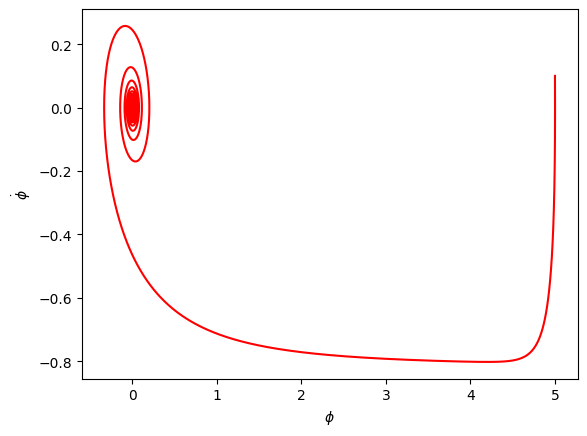

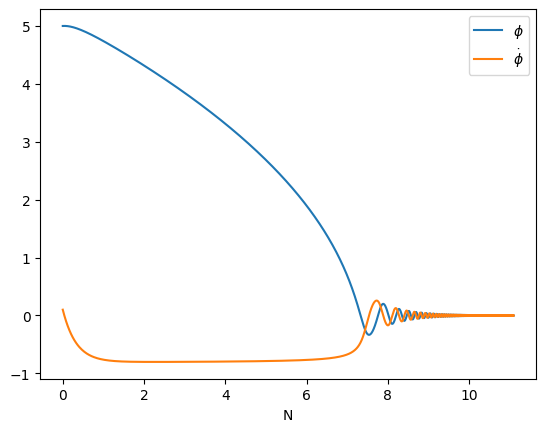

In [4]:


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m_p = 1 
m=1*m_p

xi = 5 # initial field value
yi = 0.1 # initial field velocity
zi = np.sqrt(yi**2/6 + m**2*xi**2/6) # initial value of hubble parameter
Ai = 1e-3 # initial value of scale factor

def sys(var, T):
    [x, y, z, A] = var

    # Note that all derivatives are taken wrt the scaled, dimenstionless cosmic time T

    dxdT = y
    dydT = -3*z*y - m**2*x 
    dzdT = -0.5*y**2 
    dAdT = A*z
    
    return [dxdT, dydT, dzdT, dAdT]

 
T = np.linspace(0, 1000, 100000)


# invoking the ODE solver
# solve_ivp used in below, reserve this as a comparison
sol = odeint(sys, [xi,yi,zi,Ai], T, rtol=3e-14, atol=2e-35, mxstep=900000000)
x, y, z, A = np.transpose(sol)
phi, phi_t, H = x, y, z

m2phi2=m**2*phi**2

# The number of e-folds can be used as a time-axis for studying the behaviour of various quantities
N = np.log(A/Ai) # number of e-folds of expansion elapsed
#Nt = 77.4859 # number of e-folds elapsed when inflation ends (value needs to be fixed from the behaviour of epsH)
#Ne = Nt - N # number of e-folds of expansion remaining before the end of inflation







plt.plot(phi,phi_t, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\dot\phi$')
plt.show()

plt.plot(N, phi, label=r'$\phi$')
plt.plot(N, phi_t, label=r'$\dot\phi $')
plt.legend()
plt.xlabel('N')
plt.show()

Let's think analytically. Combine EoM and Friedman equations:

$\frac{d\dot\phi}{d\phi}=-\frac{\sqrt{\frac{3}{2}}\left(\dot\phi^2+m^2\phi^2\right)^{1/2}\dot\phi+m^2\phi}{\dot\phi}$


*1)  $\dot\phi\gg m^2\phi^2$,

becomes
   
$\frac{d\dot\phi}{d\phi}=-\sqrt{\frac{3}{2}}\dot\phi$

 Then:
        
$\dot\phi=\dot\phi_0 e^{-\sqrt{\frac{3}{2}\phi}}$

$\dot\phi$ decays exponentially, and regardless of the initial value, it will rapidly meet the attractor. During this process, $\phi$ does not undergo significant changes. As we can see on the right side of the figure, the rapid decay.

$\phi\sim lnt\qquad H^2\sim t^{-2}$
    
*2)   $\dot\phi\ll m^2\phi^2$, $|\phi|\gg 1$, 



$d\dot\phi/d\phi\sim0$(?)

$\dot\phi\sim const \qquad \phi\sim const\cdot \Delta t$

As we can see, the flat part of the figure.

3)Graceful exit

Friedman equation:

$H^2\sim -\dot\phi^2+m^2\phi^2$

$\dot\phi\sim H sin\theta \qquad m_\phi\sim Hcos\theta$

then:
$\dot H\sim H^2 sin^2\theta$

$\dot \theta=-m-\frac{3}{2}Hsin2\theta$

because $\dot H$ is always negative. H decays continuously, so the second term can be ignored.

$\theta\sim -mt$

then:
\begin{align}
\dot H&\sim -H^2 sin^2(-mt)\\
-\frac{dH}{H^2}&\sim sin(mt)dt\\
\frac{1}{H}&\sim \frac{1}{m}(\frac{mt}{2}-\frac{1}{4}sin2mt)\\
H&\sim \frac{1}{t}\left(1-\frac{sin(2mt)}{2mt}\right)^{-1}
\end{align}
then:
$\phi\sim\frac{cosmt}{mt}\left(1+\frac{sin2mt}{2mt}\right)$

more detail we discuss in latex note.

In [34]:
########################################################################################

slow roll parameters：

$\epsilon_H=-\frac{\dot H}{H^2}=1-\frac{a\ddot a }{\dot a^2}$

During inflation, $\ddot a > 0$, $\epsilon \sim 0$, $a = 0$, $\epsilon = 1$ marks the end of inflation

$\eta_H=\frac{\ddot \phi}{H\dot\phi}=\epsilon_H+\frac{1}{2\epsilon_H}\frac{d\epsilon_H}{dN}$

It starts small and then oscillates with the subsequent oscillation of $\epsilon$. These processes can also be analyzed by the behavior of $\phi$ and $\dot\phi$, but they are similar.

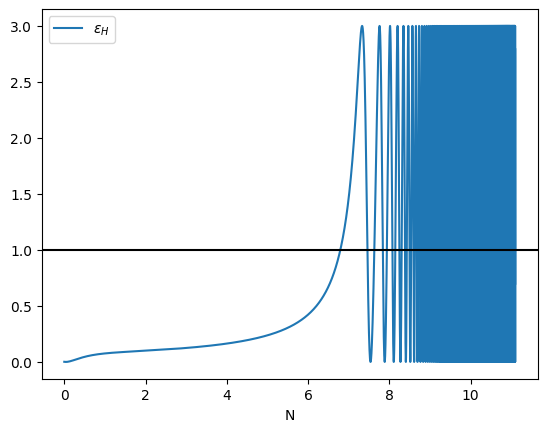

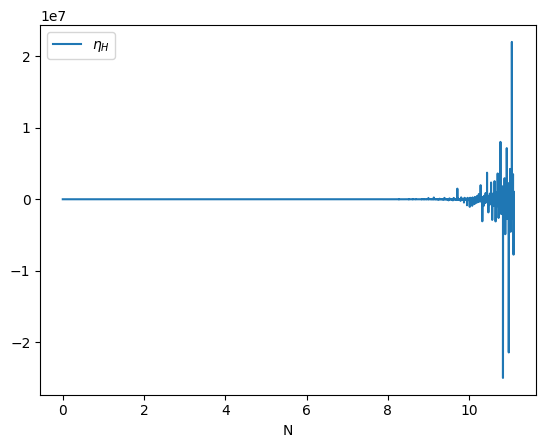

In [35]:

eps=0.5*phi_t**2/H**2
eta=-(3*H*phi_t - m**2*phi)/(H*phi_t)
plt.plot(N, eps, label=r'$\epsilon_H$')
plt.axhline(1, color='black')
plt.legend()
plt.xlabel('N')
plt.show()

plt.plot(N, eta, label=r'$\eta_H $')
plt.legend()
plt.xlabel('N')
plt.show()

Let's  use e-fold N

$\dot\phi=\frac{d}{dt}\phi=\frac{d}{dN}\frac{dN}{dt}\phi=H\phi'$

$\ddot\phi=\frac{d}{dt}(H\phi')=HH'\phi+H^2\phi''$

Then the equation of motion:

$\phi''=-(3+\frac{H'}{H})\phi'-\frac{V_\phi}{H^2}=-(3-\frac{1}{2}\phi'^2)\phi'-\frac{m^2\phi}{H^2}$

$H'=\frac{\dot H}{H}=-\frac{1}{2}H\phi'^2$

$a'=\frac{d a}{d lna}=a$

Then:

$\frac{dx}{dN}=y$

$\frac{dy}{dN}=-(3-\frac{1}{2}y^2)y - \frac{m^2x}{z^2}$

$\frac{dz}{dT}=-\frac{1}{2}zy^2$

$\frac{dA}{dT}=A$

The figures look strange because we are drawing $\phi$ and $\phi '$. But this is correct.  When we use  $\dot\phi$, everything is perfect.


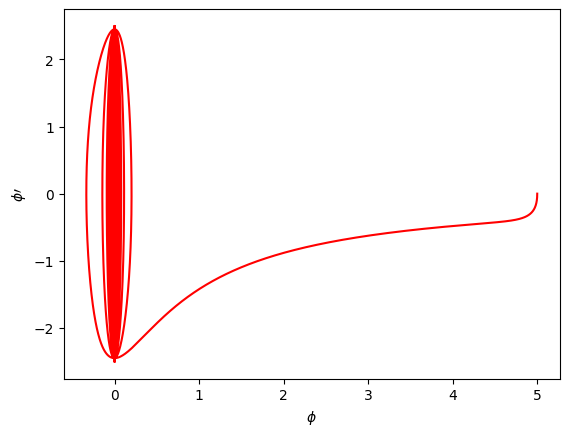

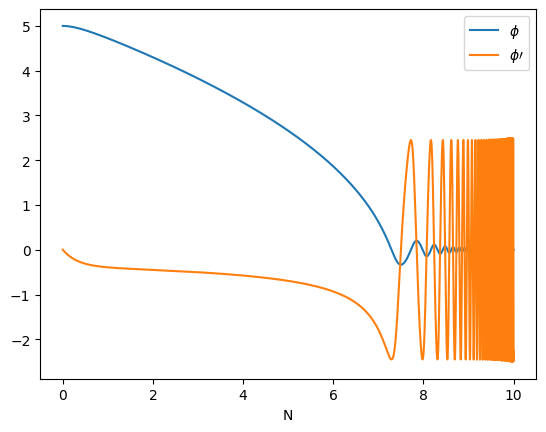

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

m_p = 1 
m = 1 * m_p

xi = 5  # initial field value
yi = 0.001  # initial field velocity
zi = np.sqrt(yi**2/6 + m**2*xi**2/6)  # initial value of hubble parameter
Ai = 1e-3  # initial value of scale factor

def sys(t, var):
    x, y, z, A = var
    dxdN = y
    dydN = -(3 - 0.5 * y**2) * y - m**2 * x / (z**2)
    dzdN = -0.5 * z * y**2
    dAdN = A
    return [dxdN, dydN, dzdN, dAdN]

N = np.linspace(0, 10, 10000)  # Time points where solution is needed

# invoking the ODE solver
sol = solve_ivp(sys, [N[0], N[-1]], [xi, yi, zi, Ai], t_eval=N, rtol=1e-8, atol=1e-10, method='RK45')
t = sol.t
x, y, z, A = sol.y
phi, phi_N, H = x, y, z

plt.plot(phi, phi_N, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\phi\prime $')
plt.show()

plt.plot(t, phi, label=r'$\phi$')
plt.plot(t, phi_N, label=r'$\phi\prime$')
plt.legend()
plt.xlabel('N')
plt.show()

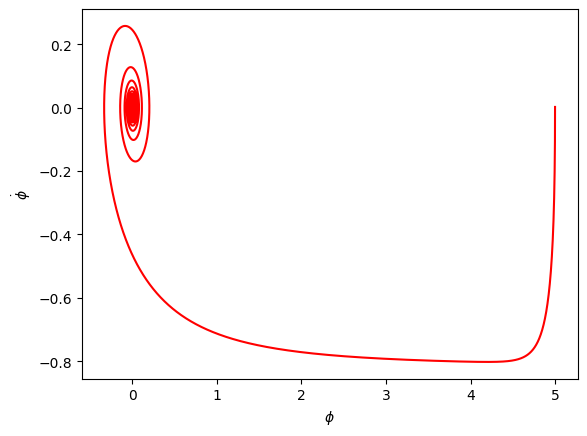

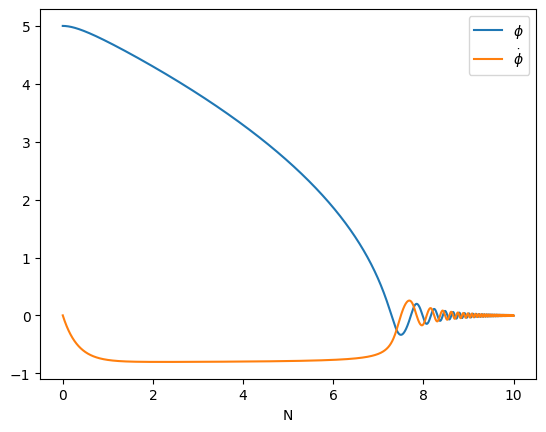

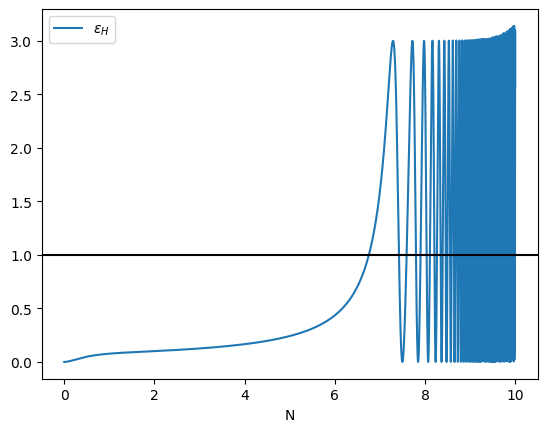

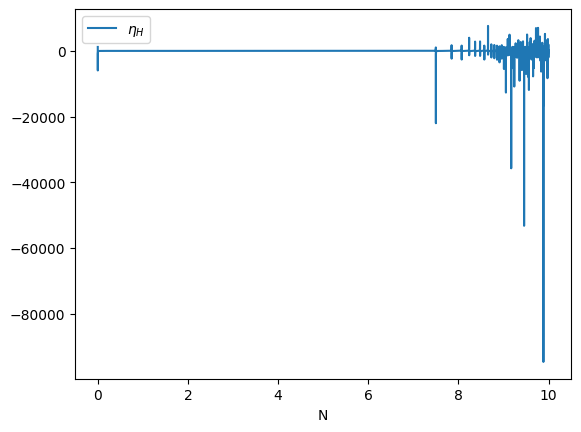

In [38]:
plt.plot(phi, H*phi_N, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\dot\phi$')
plt.show()

plt.plot(t, phi, label=r'$\phi$')
plt.plot(t, H*phi_N, label=r'$\dot\phi$')
plt.legend()
plt.xlabel('N')
plt.show()

eps=0.5*phi_N**2
eta=-(3*H**2*phi_N - m**2*phi)/(H**2*phi_N)
plt.plot(N, eps, label=r'$\epsilon_H$')
plt.axhline(1, color='black')
plt.legend()
plt.xlabel('N')
plt.show()

plt.plot(N, eta, label=r'$\eta_H $')
plt.legend()
plt.xlabel('N')
plt.show()

The N value when $\epsilon_H=1$

In [26]:
index_of_inflation_end = np.argmin(np.abs(eps - 1))
    
N_value=N[index_of_inflation_end]

print(f'The end of inflation: N= {N_value}')


The end of inflation: 9.855985598559856
